ANN on Digits Data-set

Plotting

Confusion Matrix

Classification Report

Accuracy

In [ ]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
dataset = load_digits()
print(dataset.data.shape)
dataset

(1797, 64)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
img = dataset.images
img[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
def form(n):
  image = img[n]
  for x in range(image.shape[0]):
      for y in range(image.shape[1]):
          image[y][x] = numpy.uint8(image[x][y])

#Create a PIL image.
  imgs = Image.fromarray(image, 'L')
  return imgs

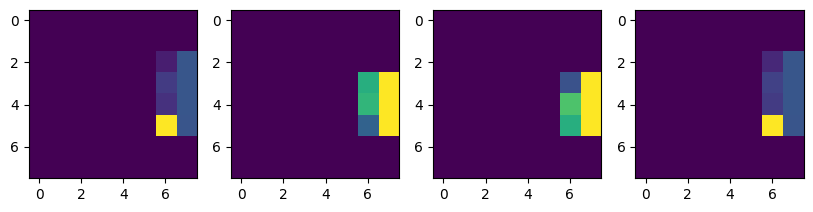

In [ ]:
f, axarr = plt.subplots(1, 4, figsize=(10,10))
axarr[0].imshow(form(0))
axarr[1].imshow(form(1))
axarr[2].imshow(form(2))
axarr[3].imshow(form(3))

In [ ]:
x = dataset.data
y = dataset.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.shape

(1257, 64)

In [ ]:
x_test.shape

(540, 64)

In [ ]:
y_train

array([9, 3, 6, ..., 7, 7, 8])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.03137255, 0.03921569,
       0.05490196, 0.01176471, 0.        , 0.        , 0.00392157,
       0.05098039, 0.05098039, 0.03529412, 0.04705882, 0.03137255,
       0.        , 0.        , 0.02352941, 0.0627451 , 0.03137255,
       0.03137255, 0.0627451 , 0.01568627, 0.        , 0.        ,
       0.01960784, 0.0627451 , 0.0627451 , 0.0627451 , 0.03529412,
       0.        , 0.        , 0.        , 0.        , 0.01960784,
       0.03137255, 0.05490196, 0.04705882, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01176471, 0.0627451 ,
       0.01960784, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05882353, 0.03137255, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00392157, 0.04705882,
       0.00784314, 0.        , 0.        , 0.        ])

In [ ]:
#Flattaning layer operation will be require to give 784 pixel values as input
model = Sequential()
model.add(Flatten())
model.add(Dense(128,activation="relu"))#no need to give inputs flatten layer will automatically gives  #here 128nodes for input layer
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"]) #in sparse categorical crossentropy we dont need to do one hot encoding

In [ ]:
history= model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
32/32 [==============================] - 1s 9ms/step - loss: 2.2753 - accuracy: 0.3154 - val_loss: 2.2311 - val_accuracy: 0.4722
Epoch 2/25
32/32 [==============================] - 0s 4ms/step - loss: 2.1467 - accuracy: 0.4866 - val_loss: 2.0089 - val_accuracy: 0.4921
Epoch 3/25
32/32 [==============================] - 0s 4ms/step - loss: 1.8117 - accuracy: 0.5950 - val_loss: 1.5581 - val_accuracy: 0.6429
Epoch 4/25
32/32 [==============================] - 0s 4ms/step - loss: 1.3390 - accuracy: 0.7552 - val_loss: 1.0953 - val_accuracy: 0.7619
Epoch 5/25
32/32 [==============================] - 0s 3ms/step - loss: 0.9135 - accuracy: 0.8149 - val_loss: 0.7622 - val_accuracy: 0.8135
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.8448 - val_loss: 0.6203 - val_accuracy: 0.8214
Epoch 7/25
32/32 [==============================] - 0s 4ms/step - loss: 0.5355 - accuracy: 0.8657 - val_loss: 0.4983 - val_accuracy: 0.8611
Epoch 8/25
32/32 [==

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 18,986
Trainable params: 18,986
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history["accuracy"]

[0.3154228925704956,
 0.4865671694278717,
 0.5950248837471008,
 0.7552238702774048,
 0.8149253726005554,
 0.8447760939598083,
 0.8656716346740723,
 0.8835821151733398,
 0.8845770955085754,
 0.89552241563797,
 0.8995025157928467,
 0.902487576007843,
 0.9124377965927124,
 0.9104477763175964,
 0.9253731369972229,
 0.9313432574272156,
 0.9333333373069763,
 0.9363183975219727,
 0.939303457736969,
 0.9462686777114868,
 0.9522387981414795,
 0.9582089781761169,
 0.9562188982963562,
 0.9522387981414795,
 0.9552238583564758]

In [ ]:
y_prob = model.predict(x_test)

17/17 [==============================] - 0s 2ms/step


In [ ]:
y_prob

array([[1.22561085e-11, 3.06263729e-03, 9.96182561e-01, ...,
        2.03357995e-05, 3.85853753e-04, 1.01959567e-05],
       [1.89671220e-04, 1.19751863e-01, 3.52633023e-03, ...,
        1.78182242e-03, 8.02635372e-01, 5.63248876e-04],
       [1.11241091e-14, 6.49034686e-04, 9.99290705e-01, ...,
        6.46632117e-08, 2.83159861e-05, 3.36292203e-08],
       ...,
       [7.03483529e-04, 2.36802043e-05, 5.28820067e-07, ...,
        2.82360291e-09, 1.07275955e-02, 8.72227872e-07],
       [1.76241266e-09, 2.85890866e-02, 9.10814106e-01, ...,
        2.10407634e-05, 5.56845814e-02, 1.54703393e-05],
       [1.04863562e-01, 7.23077665e-06, 6.44689062e-05, ...,
        4.84374323e-06, 5.16017601e-02, 7.31475234e-01]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1) #Taking only one higher probablity

In [ ]:
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 1, 9, 7, 2, 3, 6, 0, 5, 5, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 4,
       3, 4, 8, 9, 7, 9, 8, 8, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 3, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 1, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 2, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 2, 2, 9, 4, 1, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 2, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

Confusion Matrix


<Axes: >

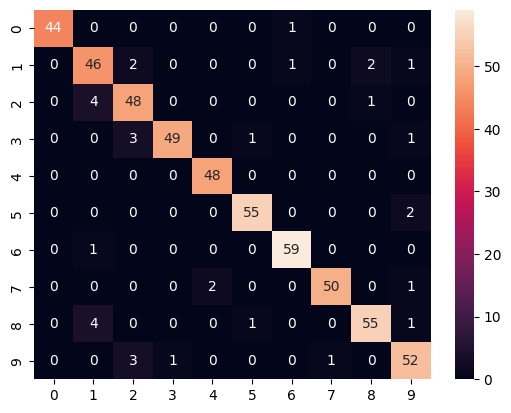

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
print("Classification Report: ")
classes = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred, target_names = classes))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.84      0.88      0.86        52
           2       0.86      0.91      0.88        53
           3       0.98      0.91      0.94        54
           4       0.96      1.00      0.98        48
           5       0.96      0.96      0.96        57
           6       0.97      0.98      0.98        60
           7       0.98      0.94      0.96        53
           8       0.95      0.90      0.92        61
           9       0.90      0.91      0.90        57

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy: 93.70%
